#plotly data visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
# import plotly.express as px

df=sns.load_dataset('iris')
df.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
fig=px.scatter(df,x='sepal_length',y='sepal_width',color='species')
fig.show()
fig.write_html('fig.html',)
fig.write_image('fig1.png',scale=3)

In [7]:
fig_line=df.sort_values(by=['sepal_length'])
fig2=px.line(fig_line,x='sepal_length',y='sepal_width',color='species')
fig2.show()


fig2.write_html('fig2.html',)
fig2.write_image('fig2.png',scale=3)

In [8]:
df_bar=df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [9]:
df_bar=df.groupby(['species']).mean().reset_index()

fig3=px.bar(df_bar,x='species',y='sepal_width')
fig3.show()

fig3.write_html('fig3.html',)
fig3.write_image('fig3.png',scale=3)


<Axes: xlabel='species', ylabel='sepal_width'>

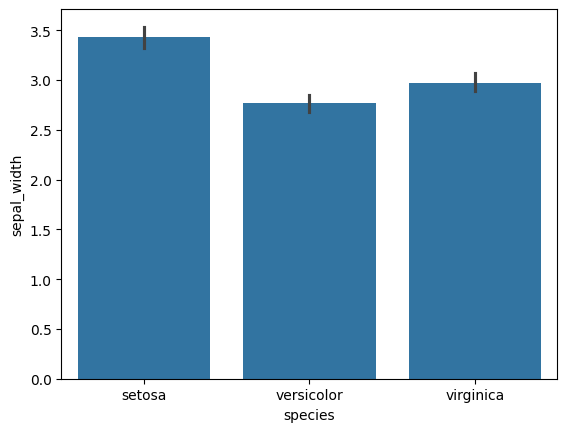

In [10]:
sns.barplot(df,x='species',y='sepal_width')


In [11]:
fig4=px.box(df,x='species',y='sepal_width',color='species')
fig4.show()

fig4.write_html('fig4.html',)
fig4.write_image('fig4.png',scale=3)

In [12]:
fig5=px.violin(df,x='species',y='sepal_width',color='species',box=True)   #box=True will show the box plot
fig5.show()

fig5.write_html('fig5.html',)
fig5.write_image('fig5.png',scale=3)


In [13]:
hist = px.histogram(df, x='sepal_width', color='species', barmode='overlay')
hist.show()

hist.write_html('hist.html')
hist.write_image('hist.png', scale=3)

## Explanation of barmode='overlay'
In Plotly, the `barmode` attribute in a histogram determines how bars at the same location coordinate are displayed. When `barmode='overlay'` is set, bars are plotted on top of each other, allowing for comparison of distributions. This can be useful for visualizing the distribution of different categories in the same plot.

In [14]:
# df['species'].value_counts()   

In [15]:
df_pie=df['species'].value_counts().reset_index()
df_pie.columns=['species','count']
df_pie.head()
fig7=px.pie(df_pie,names='species',values='count')
fig7.show()  
fig7.write_html('fig7.html')
fig7.write_image('fig7.png',scale=3)  

In [16]:
fig8=px.scatter_3d(df,x='sepal_length',y='sepal_width',z='petal_length',color='species')
fig8.show()
fig8.write_html('fig8.html')
fig8.write_image('fig8.png',scale=3)

In [17]:
df_area=df.sort_values(by=['sepal_length'])

fig9=px.area(df_area,x='sepal_width',y='sepal_length',color='species')
fig9.show() 
fig9.write_html('fig9.html')
fig9.write_image('fig9.png',scale=3)

In [18]:
fig10=px.scatter(df,x='sepal_length',y='sepal_width',color='species',size='petal_length')
fig10.show()
fig10.write_html('fig10.html')
fig10.write_image('fig10.png',scale=3)

In [19]:
df_sunburst=df.groupby(['species','petal_width']).size().reset_index(name='count')
# df_sunburst.head()
fig11=px.sunburst(df_sunburst,path=['species','petal_width'],values='count')
fig11.show()    
fig11.write_html('fig11.html')
fig11.write_image('fig11.png',scale=3)

In [22]:
df['species_id']=df['species'].astype('category').cat.codes
fig12=px.parallel_coordinates(df, color='species_id', labels={'species_id':'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()
fig12.write_html('fig12.html')
fig12.write_image('fig12.png', scale=3)